In [1]:
import cfgrib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from baselines.data_processor import DataProcessor
from baselines.lgb.lgb_regressor import LightGBMRegressor

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [2]:
processor = DataProcessor(spatial_encoding=True)
data, feature_list = DataProcessor.load_data()
s = 5
fh = 1

X, y = processor.preprocess(s, fh, use_neighbours=False)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [3]:
X_train.shape, X_test.shape

((1457, 25, 45, 5, 10), (1458, 25, 45, 5, 10))

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConve

t2m => RMSE:  1.2057; MAE: 0.9357520174710795; SE: 0.07504634512116562
sp => RMSE:  1.78134; MAE: 1.370846675206006; SE: 0.5629205823749205
tcc => RMSE:  0.12826; MAE: 0.10798660350878797; SE: 0.0021560595421948993
u10 => RMSE:  1.82977; MAE: 1.1793456825704862; SE: 0.04283787052263926
v10 => RMSE:  1.69799; MAE: 1.370142747473962; SE: 0.03975420023696327
tp => RMSE:  9e-05; MAE: 6.23727861138718e-05; SE: 3.076345900689437e-06


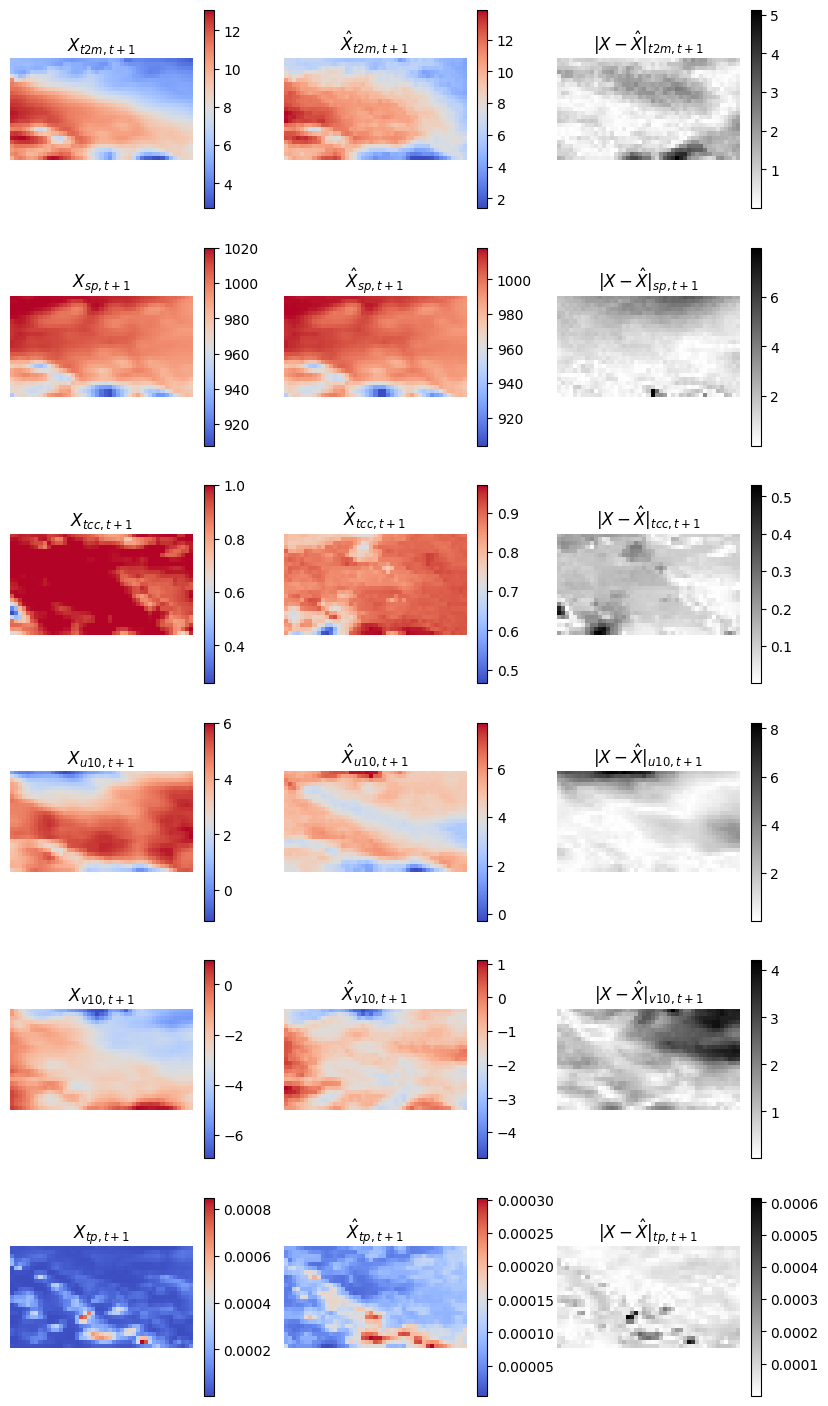

Evaluation metrics for entire test set:
t2m => RMSE: 1.747;  MAE: 1.329; SE: 0.006537278974024278
sp => RMSE: 1.667;  MAE: 1.163; SE: 0.016475133023174895
tcc => RMSE: 0.286;  MAE: 0.227; SE: 0.00028511130329099296
u10 => RMSE: 1.476;  MAE: 1.094; SE: 0.0024523385946696313
v10 => RMSE: 1.484;  MAE: 1.093; SE: 0.0020262920120716933
tp => RMSE: 0.0;  MAE: 0.0; SE: 2.2500528758443794e-07


 97.7508487701416 [S]


In [4]:
from time import time 
start = time()

regressor = LightGBMRegressor(X.shape, fh, feature_list)
regressor.train(X_train, y_train, normalize=True)
_ = regressor.predict_and_evaluate(X_test, y_test, max_samples=1)
print()
    
stop = time()
print('\n', stop-start, '[S]')

Best score s=5; fh=1

Evaluation metrics for entire test set:

t2m => RMSE: 1.746;  MAE: 1.329; SE: 0.006537278974024278

tcc => RMSE: 1.664;  MAE: 1.159; SE: 0.016475133023174895

u10 => RMSE: 0.286;  MAE: 0.228; SE: 0.00028511130329099296

v10 => RMSE: 1.475;  MAE: 1.093; SE: 0.0024523385946696313

tp => RMSE: 1.48;  MAE: 1.09; SE: 0.0020262920120716933

sp => RMSE: 0.0;  MAE: 0.0; SE: 2.2500528758443794e-077

<br>

Performance with neighbours is slightly better but does not compensate enough computation time and memory footprint

t2m => RMSE: 1.726;  MAE: 1.314; SE: 0.006537278974024278

sp => RMSE: 1.628;  MAE: 1.144; SE: 0.016475133023174895

tcc => RMSE: 0.283;  MAE: 0.224; SE: 0.00028511130329099296

u10 => RMSE: 1.441;  MAE: 1.067; SE: 0.0024523385946696313

v10 => RMSE: 1.45;  MAE: 1.067; SE: 0.0020262920120716933

tp => RMSE: 0.0;  MAE: 0.0; SE: 2.2500528758443794e-07

<br>

It is also available to run it with spatial encodings but doesn not improve performance.